# Project: Data Wrangling on @dog_rates Twitter account

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data will be gathered from three different sources and in a variety of formats for the @dog_rates Twitter account also known as WeRateDogs.  WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10, but the numerators are often higher than 10.  WeRateDogs has over 4 million followers and has received international media coverage.  Udacity has provided me with a Twitter archive that contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

I will be data wrangling: assessing the data quality, data tidiness, and cleaning the data. I will be documenting my analyses and visualizations below. 


<a id='gather'></a>
## Gather Data

# 1. WeRateDogs Twitter Archive downloaded from Udacity website.

In [1]:
#Import twitter_archive_enhanced.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
df_tweets.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [3]:
#Check for missing data
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are only 181 tweets that have retweet_id, user_id, and timestamp data.  I need to look at the other data to import as I don't think I should neglect all the other columns just yet that is missing this data.

In [4]:
#Check for duplicates
df_tweets.duplicated().sum()

0

# 2. Import Image Predictions hosted on Udacity's Servers.

In [5]:
#Import image_predictions.tsv -- 
#Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
import requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [6]:
#Save response as a file
response.content
with open ("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
#load file into memory
image_predictions=pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.shape

(2075, 12)

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# 3. Twitter API to JSON Data

In [10]:
#Import Tweet IDs
import tweepy
import json

consumer_key =  ''
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api.wait_on_rate_limit = True
api.wait_on_rate_limit = True

In [11]:
#for tweet_id in df_tweets['tweet_id'].values:
#    try:
#        tweet = api.get_status(tweet_id, tweet_mode='extended')
#        with open('tweet_json.txt', 'a') as txt:
#            txt.write(json.dumps(tweet) + '\n')
#        print('Success')
#    except tweepy.TweepError:
#        continue
        

In [12]:
#DataFrame with (at minimum) tweet ID, retweet count, and favorite count
df = pd.read_json('tweet_json.txt', lines=True)

In [13]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36996,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7895,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31843,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5865,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23981,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3869,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40326,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8062,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38538,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8729,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2833 non-null datetime64[ns]
display_text_range               2833 non-null object
entities                         2833 non-null object
extended_entities                2469 non-null object
favorite_count                   2833 non-null int64
favorited                        2833 non-null bool
full_text                        2833 non-null object
geo                              0 non-null float64
id                               2833 non-null int64
id_str                           2833 non-null int64
in_reply_to_screen_name          101 non-null object
in_reply_to_status_id            101 non-null float64
in_reply_to_status_id_str        101 non-null float64
in_reply_to_user_id              101 non-null float64
in_reply_to_user_id_str          

<a id='wrangling'></a>
## Data Wrangling

 - I only want original ratings (no retweets) from the three datasets.

In [15]:
df_tweets.shape

(2356, 17)

In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#No Tweet ID duplicates
df_tweets['tweet_id'].duplicated().sum()

0

In [18]:
df_tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None
1629,684567543613382656,NaN,NaN,2016-01-06 02:49:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None
1298,707741517457260545,NaN,NaN,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707741517...,10,10,None,None,None,None,None


In [19]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
#How many have a numerator over 10
numerator_over10=df_tweets[df_tweets['rating_numerator']> 10]
numerator_over10.shape

(1455, 17)

In [21]:
numerator_over20=df_tweets[df_tweets['rating_numerator']> 20]
numerator_over20.shape

(24, 17)

24 Entries are very highly rated over 20! The max entry is 1776.

In [22]:
df_tweets[df_tweets['rating_numerator']> 15].shape

(26, 17)

Tweets with a rating_numerator over 15 should be deleted as they are inconsistent with the other data.

In [23]:
df_tweets.query('rating_numerator == "1776"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [24]:
num_under10=df_tweets[df_tweets['rating_numerator']< 10]
num_under10.shape

(440, 17)

In [25]:
numerator_over20.expanded_urls.sample(5)

695     https://twitter.com/dog_rates/status/786709082...
290                                                   NaN
1351    https://twitter.com/dog_rates/status/704054845...
1843    https://twitter.com/dog_rates/status/675853064...
1635    https://twitter.com/dog_rates/status/684222868...
Name: expanded_urls, dtype: object

In [26]:
#How many have a denominator over 10
denominator_over10=df_tweets[df_tweets['rating_denominator']> 10]
denominator_over10.shape

(20, 17)

In [27]:
denominator_over10.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None


In [28]:
#How many have a denominator under 10
denominator_under10=df_tweets[df_tweets['rating_denominator']< 10]
denominator_under10.shape

(3, 17)

In [29]:
denominator_under10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [30]:
denominator_10=df_tweets[df_tweets['rating_denominator']== 10]
denominator_10.shape

(2333, 17)

Tweets with a rating_denominator not equal to 10 should be deleted as they are inconsistent with the other data.  I'm going to narrow down this data in the cleaning stage.

In [31]:
image_predictions.shape

(2075, 12)

In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1063,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111,True,soft-coated_wheaten_terrier,0.142993,True,Lakeland_terrier,0.136712,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
650,681981167097122816,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,Labrador_retriever,0.452577,True,golden_retriever,0.403420,True,beagle,0.069486,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True


In [34]:
image_predictions['p1'].nunique()

378

In [35]:
#Check for duplicates
sum(image_predictions.tweet_id.duplicated())

0

In [36]:
sum(image_predictions.jpg_url.duplicated())

66

Not sure if I should delete the jpg_url duplicates just yet.  These could be retweets.

In [37]:
jpg_dup=image_predictions['jpg_url'].value_counts()
jpg_dup.head(5)

https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg    2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg    2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg    2
Name: jpg_url, dtype: int64

These above definitely have to be retweets
because some of the pictures made me laugh!

In [38]:
df.shape

(2833, 32)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2833 non-null datetime64[ns]
display_text_range               2833 non-null object
entities                         2833 non-null object
extended_entities                2469 non-null object
favorite_count                   2833 non-null int64
favorited                        2833 non-null bool
full_text                        2833 non-null object
geo                              0 non-null float64
id                               2833 non-null int64
id_str                           2833 non-null int64
in_reply_to_screen_name          101 non-null object
in_reply_to_status_id            101 non-null float64
in_reply_to_status_id_str        101 non-null float64
in_reply_to_user_id              101 non-null float64
in_reply_to_user_id_str          

In [40]:
df.sample(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1421,NaN,NaN,2016-02-08 17:17:22,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2105,False,This is Klevin. He doesn't want his family bra...,NaN,...,NaN,NaN,NaN,NaN,957,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1970,NaN,NaN,2015-12-04 02:51:33,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672609147054067713, 'id_str'...",1100,False,This is Caryl. Likes to get in the microwave. ...,NaN,...,NaN,NaN,NaN,NaN,385,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
88,NaN,NaN,2017-06-14 16:04:48,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 875021140921417728, 'id_str'...",24457,False,Guys please stop sending pictures without any ...,NaN,...,NaN,NaN,NaN,NaN,4440,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
327,NaN,NaN,2017-02-16 13:11:05,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793286466235408384, 'id_str'...",0,False,RT @dog_rates: This is Moreton. He's the Good ...,NaN,...,NaN,NaN,NaN,NaN,9648,False,{'created_at': 'Tue Nov 01 03:00:09 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [41]:
#Are there any contributors or coordinates in the dataset?
df.contributors.nunique()

0

In [42]:
df.coordinates.nunique()

0

In [43]:
#Any retweets?
df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2833.000000,0.0,2.833000e+03,2.833000e+03,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,2632.0,2632.0,4.200000e+01,4.200000e+01,2833.000000
mean,NaN,NaN,9659.611366,NaN,7.612979e+17,7.612979e+17,7.667873e+17,7.667873e+17,2.387724e+16,2.387724e+16,0.0,0.0,8.290890e+17,8.290890e+17,3238.004236
std,NaN,NaN,13622.993639,NaN,7.540008e+16,7.540008e+16,8.032770e+16,8.032770e+16,1.374444e+17,1.374444e+17,0.0,0.0,5.594421e+16,5.594421e+16,5000.778054
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1455.000000,NaN,6.838349e+17,6.838349e+17,6.827884e+17,6.827884e+17,1.132119e+08,1.132119e+08,0.0,0.0,8.094037e+17,8.094037e+17,644.000000
50%,NaN,NaN,4189.000000,NaN,7.532945e+17,7.532945e+17,7.638652e+17,7.638652e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.436999e+17,8.436999e+17,1712.000000
75%,NaN,NaN,13391.000000,NaN,8.313160e+17,8.313160e+17,8.406983e+17,8.406983e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.735790e+17,8.735790e+17,3913.000000
max,NaN,NaN,159897.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79872.000000


Max number of retweets was 79872!  The mean is 3208 for retweet_count.

In [44]:
#Any duplicates?
df['id'].duplicated().sum()

500

In [45]:
#Check length of tweet ID in each table
len(df_tweets.tweet_id)

2356

Detect and document at least eight (8) quality issues and two (2) tidiness issues
Quality:

df_tweets
- Retweets can be deleted and they pertain to these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- Drop unnessary columns from the list above.
- Timestamp is an object and it can be changed to datetime
- Tweets rating_numerator and rating_denominator should be changed to a float.
- Name column sometimes lists None or "a", I would like to research the names and change these both to NaN.  Then it will be easier to see the top dog names.
- Check Expanded urls for duplicates and delete any found.

image_predictions
- Column names don't tell much information, rename these columns.
- p1 Column is inconsistent as not all dog names are Capitalized.
- Delete rows with duplicate jpg_urls from image_predictions table.

df Twitter
- Take out contributors, coordinates, and geo column as they all have a value of 0.

Tidiness:
 - df_Tweets with a rating_denominator not equal to 10 or a rating_numerator over 15 or under 10 should be deleted as they are inconsistent with the other data.
 - Columns of df_tweets: doggo, floofer, pupper, and puppo could be put into one column as type of dog.
 - df_tweets has 2356 rows and image_predictions has 2075.  There are 2333 columns from the df Twitter table.  These tables can be combined.
 - There are many columns in image_predictions table and only need jpg_url, p1, p1_conf, and p1_dog columns.
 - All three tables have tweet_ID or ID in common.  When these tables are merged will have to make sure this column does not show up 2-3 times in the combined dataset.  The counts_clean table will have many of the columns removed as I only want favorite_count, id, retweet_count, full_text, and source.



<a id='cleaning'></a>
## Cleaning

In [46]:
#Make copies of files
tweets_clean=df_tweets.copy()
images_clean=image_predictions.copy()
counts_clean=df.copy()

#### Define

 - Where in_reply_to_status_id and retweeted_status_user_id is null, we want to keep these values as they are not retweets.
-Retweets can be deleted and they pertain to these columns: in_reply_to_user_id, retweeted_status_id, and retweeted_status_timestamp 

In [47]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [48]:

tweets_clean=tweets_clean[tweets_clean['in_reply_to_user_id'].isnull()]
tweets_clean.shape

(2278, 17)

In [49]:
tweets_clean=tweets_clean[tweets_clean['retweeted_status_user_id'].isnull()]
tweets_clean.shape

(2097, 17)

In [50]:
#Drop columns https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas
tweets_clean=tweets_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_user_id", "in_reply_to_status_id"], axis=1)
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [51]:
tweets_clean.shape

(2097, 12)

#### Test

In [52]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

 - timestamp is an object and it can be changed to datetime

In [53]:
tweets_clean.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

#### Code

In [54]:
from datetime import datetime
#https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [55]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [56]:
tweets_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Define

- Tweets rating_numerator and rating_denominator should be changed to a float.

#### Code

In [57]:
#change from integer to float
tweets_clean.astype({'rating_numerator': 'float'}).dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [58]:
tweets_clean.astype({'rating_denominator': 'float'}).dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Test

In [59]:
tweets_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Define

 - columns: doggo, floofer, pupper, and puppo need to be changed if they have None values in them to np.Nan.

#### Code

In [60]:
tweets_clean.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [61]:
tweets_clean.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [62]:
tweets_clean.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [63]:
tweets_clean.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [64]:
#replace None values from these four rows with np.nan
tweets_clean['doggo'] = tweets_clean['doggo'].replace(['None'], np.nan)
tweets_clean['floofer'] = tweets_clean['floofer'].replace(['None'], np.nan)
tweets_clean['pupper'] = tweets_clean['pupper'].replace(['None'], np.nan)
tweets_clean['puppo'] = tweets_clean['puppo'].replace(['None'], np.nan)

In [65]:
tweets_clean.doggo.value_counts()

doggo    83
Name: doggo, dtype: int64

#### Test

In [66]:
tweets_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
57,881268444196462592,2017-07-01 21:49:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,NaN,NaN,NaN,NaN
2187,668979806671884288,2015-11-24 02:29:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,https://twitter.com/dog_rates/status/668979806...,12,10,Chaz,NaN,NaN,NaN,NaN
1928,674045139690631169,2015-12-08 01:57:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,https://twitter.com/dog_rates/status/674045139...,3,10,None,NaN,NaN,NaN,NaN


In [67]:
tweets_clean.loc[(tweets_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### Define

 - columns: doggo, floofer, pupper, and puppo will be combined to one new column.  Some tweet_ids mention two dog stages in them.

#### Code

In [68]:
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram
cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_clean['dog_stages'] = tweets_clean[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

In [69]:
tweets_clean.dog_stages.value_counts()

nan,nan,nan,nan          1761
nan,nan,pupper,nan        221
doggo,nan,nan,nan          72
nan,nan,nan,puppo          23
nan,floofer,nan,nan         9
doggo,nan,pupper,nan        9
doggo,nan,nan,puppo         1
doggo,floofer,nan,nan       1
Name: dog_stages, dtype: int64

In [70]:
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['nan,nan,nan,nan'], np.nan)
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['nan,nan,pupper,nan'], 'pupper')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['doggo,nan,nan,nan'], 'doggo')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['nan,nan,nan,puppo'], 'puppo')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['nan,floofer,nan,nan'], 'floofer')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['doggo,nan,pupper,nan'], 'doggo, pupper')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['doggo,floofer,nan,nan'], 'doggo, floofer')
tweets_clean['dog_stages'] = tweets_clean['dog_stages'].replace(['doggo,nan,nan,puppo'], 'doggo, puppo')

#### Test

In [71]:
tweets_clean.dog_stages.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [72]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


#### Test

In [73]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


#### Define

 - Name column sometimes lists None, I would like to research the dogs with "none" and "a" and change those to NaN or null.  This way I can find out the top dog names from the dataset.  

#### Code

In [74]:
low_name=tweets_clean[tweets_clean.name.str.islower().fillna(False)]
low_name.shape

(104, 13)

In [75]:
low_name.name.value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
getting          2
actually         2
not              2
such             1
unacceptable     1
incredibly       1
officially       1
all              1
life             1
my               1
this             1
infuriating      1
old              1
light            1
his              1
space            1
by               1
mad              1
Name: name, dtype: int64

In [76]:
#replace all these lowercase dog names above with np.nan
tweets_clean['name'] = tweets_clean['name'].replace(['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'getting', 'not', 'actually', 'my', 'space', 'old', 'all', 'his', 'mad', 'officially', 'by', 'incredibly', 'life', 'light', 'infuriating', 'unacceptable', 'this', 'such', 'None'], np.nan)

In [77]:
tweets_clean[tweets_clean.name.str.islower().fillna(False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages


In [78]:
tweets_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
889,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,"doggo, pupper"
1235,712668654853337088,2016-03-23 15:53:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,NaN,NaN,NaN,NaN,NaN
2242,667911425562669056,2015-11-21 03:44:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Wow. Armored dog here. Ready for battle. Face ...,https://twitter.com/dog_rates/status/667911425...,5,10,NaN,NaN,NaN,NaN,NaN,NaN
1435,697259378236399616,2016-02-10 03:22:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,https://twitter.com/dog_rates/status/697259378...,8,10,NaN,NaN,NaN,NaN,NaN,NaN
59,880872448815771648,2017-06-30 19:35:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
from collections import Counter
counter = Counter(tweets_clean['name'].tolist())
print(counter.most_common(15))

[(nan, 707), ('Charlie', 11), ('Lucy', 11), ('Oliver', 10), ('Cooper', 10), ('Penny', 9), ('Tucker', 9), ('Lola', 8), ('Sadie', 8), ('Winston', 8), ('Daisy', 7), ('Toby', 7), ('Jax', 6), ('Koda', 6), ('Bella', 6)]


In [80]:
#Let's find out the top 10 dog names by popularity
tweets_clean.groupby('name').count().sort_values(by='tweet_id', ascending=False).iloc[:10, :1]

,tweet_id
name,
Lucy,11
Charlie,11
Oliver,10
Cooper,10
Penny,9
Tucker,9
Sadie,8
Lola,8
Winston,8


#### Test

In [81]:
tweets_clean.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,NaN
2355,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,NaN


#### Define

- Check Expanded urls for duplicates and delete any found.

In [82]:
sum(tweets_clean['expanded_urls'].duplicated())

3

#### Code

In [83]:
tweets_clean['expanded_urls'].drop_duplicates(inplace=True)

#### Test

In [84]:
sum(tweets_clean.expanded_urls.duplicated())

0

In [85]:
tweets_clean.shape

(2097, 13)

In [86]:
sum(tweets_clean.text.duplicated())

0

#### Define

image_predictions
 - Column names don't tell much information and only need the tweet_id, jpg_url, img_num, p1, p1_conf, and p1_dog columns.  I'm going to drop the other columns not needed.

In [87]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [88]:
images_clean=images_clean.drop(["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis=1)
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


#### Test

In [89]:
images_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False


#### Define

image_predictions
 - Rename column headings so they make sense.

#### Code

In [90]:
images_clean.columns = ['tweet_id', 'jpg_url', 'img_num', 'type_of_dog', '% prediction', 'prediction_dog']

#### Test

In [91]:
images_clean.head()

,tweet_id,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


#### Define

image_predictions 
 - p1 Column is inconsistent with not all dog names Capitalized

#### Code

In [92]:
images_clean.dtypes

tweet_id            int64
jpg_url            object
img_num             int64
type_of_dog        object
% prediction      float64
prediction_dog       bool
dtype: object

In [93]:
#Capitalize first letter in the type_of_dog column https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html
images_clean['type_of_dog']=images_clean['type_of_dog'].str.title()

#### Test

In [94]:
images_clean.sample(5)

,tweet_id,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,Padlock,0.731564,False
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,Long-Horned_Beetle,0.613852,False
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,1,Kuvasz,0.223148,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,Geyser,0.991273,False


In [95]:
#If dog predicted false is it still a dog image?
false_dog=images_clean[images_clean['prediction_dog']== False]
false_dog.head(5)

,tweet_id,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Desktop_Computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Three-Toed_Sloth,0.914671,False


I viewed some of these images and there isn't enough information as some that are predicted as false for a dog, the image is still a dog.

#### Define

 - Delete rows with duplicate jpg_urls from image_predictions table.

In [96]:
images_clean.shape

(2075, 6)





#### Code

In [97]:
#check for jpg url duplicates
image_dups=images_clean['jpg_url'].value_counts()
image_dups.sample(5)

https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg    1
https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg    1
https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg    1
https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg    1
https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg    1
Name: jpg_url, dtype: int64

In [98]:
images_clean=images_clean.drop_duplicates(['jpg_url'], keep='first')

In [99]:
image_dups2=images_clean['jpg_url'].value_counts()
image_dups2.head(5)

https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg    1
https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg    1
https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg    1
https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg    1
https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg    1
Name: jpg_url, dtype: int64

In [100]:
#check if duplicate jpg_urls were deleted
images_clean.shape

(2009, 6)

#### Test

In [101]:
images_clean.sample(2)

,tweet_id,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,Golden_Retriever,0.883229,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True


#### Define

counts_clean
 - Take out contributors, coordinates, and geo column as they all have a value of 0.  Must keep columns tweet ID, retweet count, and favorite count, and any others neccessary.

#### Code

In [102]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2833 non-null datetime64[ns]
display_text_range               2833 non-null object
entities                         2833 non-null object
extended_entities                2469 non-null object
favorite_count                   2833 non-null int64
favorited                        2833 non-null bool
full_text                        2833 non-null object
geo                              0 non-null float64
id                               2833 non-null int64
id_str                           2833 non-null int64
in_reply_to_screen_name          101 non-null object
in_reply_to_status_id            101 non-null float64
in_reply_to_status_id_str        101 non-null float64
in_reply_to_user_id              101 non-null float64
in_reply_to_user_id_str          

In [103]:
counts_clean.sample(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1567,NaN,NaN,2016-01-11 22:56:10,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686683039674531840, 'id_str'...",2872,False,This is Mona. She's a Yarborough Splishnsplash...,NaN,...,NaN,NaN,NaN,NaN,823,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
340,NaN,NaN,2017-02-13 22:03:49,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831262617675051009, 'id_str'...",12221,False,This is Tucker. He's feeling h*ckin festive an...,NaN,...,NaN,NaN,NaN,NaN,2108,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [104]:
col_list=['id', 'retweet_count', 'favorite_count']
counts_clean=counts_clean[col_list]

#### Test

In [105]:
counts_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7895,36996
1,892177421306343426,5865,31843
2,891815181378084864,3869,23981
3,891689557279858688,8062,40326
4,891327558926688256,8729,38538


In [106]:
#rename id column to tweet_id
counts_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

In [107]:
counts_clean.sample(2)

,tweet_id,retweet_count,favorite_count
867,759846353224826880,2036,6914
2296,666447344410484738,19,98


In [108]:
sum(counts_clean.tweet_id.duplicated())

500

In [109]:
counts_clean['tweet_id'].drop_duplicates(inplace=True)

In [110]:
sum(counts_clean.tweet_id.duplicated())

0


## Tidiness:

#### Define

#### Code

- tweets_clean with a rating_denominator not equal to 10 or a rating_numerator over 15 or under 10 should be deleted as they are inconsistent with the other data.

#### Code

In [111]:
tweets_clean.shape

(2097, 13)

In [112]:
tweets_clean=tweets_clean[tweets_clean['rating_denominator']==10]
tweets_clean.shape

(2080, 13)

In [113]:
tweets_clean[tweets_clean['rating_numerator']<15].shape

(2075, 13)

In [114]:
tweets_clean=tweets_clean[tweets_clean['rating_numerator']<15]
tweets_clean.shape

(2075, 13)

In [115]:
tweets_clean[tweets_clean['rating_numerator']>10].shape

(1224, 13)

In [116]:
tweets_clean=tweets_clean[tweets_clean['rating_numerator']>10]
tweets_clean.shape

(1224, 13)

#### Test

In [117]:
tweets_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
825,769695466921623552,2016-08-28 00:37:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,https://twitter.com/dog_rates/status/769695466...,13,10,Titan,NaN,NaN,NaN,NaN,NaN
1432,697482927769255936,2016-02-10 18:11:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,NaN,NaN,NaN,NaN,NaN
1785,677644091929329666,2015-12-18 00:18:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,https://twitter.com/dog_rates/status/677644091...,11,10,NaN,NaN,NaN,NaN,NaN,NaN
1263,710117014656950272,2016-03-16 14:54:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper got her hair chalked for her birth...,https://twitter.com/dog_rates/status/710117014...,11,10,NaN,NaN,NaN,pupper,NaN,pupper
1524,690597161306841088,2016-01-22 18:09:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,NaN,NaN,NaN,NaN,NaN


#### Define

 - Delete doggo, floofer, pupper, and puppo columns since that information was used for a new column.

#### Code

In [118]:
tweets_clean=tweets_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)
tweets_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2307,666826780179869698,2015-11-18 03:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,https://twitter.com/dog_rates/status/666826780...,12,10,NaN,NaN
2324,666421158376562688,2015-11-17 01:02:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,12,10,NaN,NaN
2329,666373753744588802,2015-11-16 21:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,11,10,NaN,NaN
2336,666273097616637952,2015-11-16 15:14:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097...,11,10,NaN,NaN
2339,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,NaN


In [119]:
tweets_clean.dog_stages.value_counts()

pupper            130
doggo              61
puppo              19
floofer             8
doggo, pupper       7
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [120]:
#change from integer to category
tweets_clean.astype({'dog_stages': 'category'}).dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stages                       category
dtype: object

#### Test

In [121]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


 - df_tweets has 2356 rows and image_predictions has 2075.  There are 2333 columns from the df Twitter table.  There are many columns in image_predictions table and only need jpg_url, p1, p1_conf, and p1_dog columns.  The counts_clean table will have many of the columns removed as I only want favorite_count, id, retweet_count, full_text, and source.

In [122]:
tweets_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1586,686760001961103360,2016-01-12 04:01:58+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,https://vine.co/v/iMvubwT260D,12,10,NaN,pupper
762,778039087836069888,2016-09-20 01:12:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,https://twitter.com/dog_rates/status/778039087...,12,10,NaN,pupper


In [123]:
sum(tweets_clean.tweet_id.duplicated())

0

In [124]:
#remove source column as I am only concerned with tweet_id, and ratings.
col_lists=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stages']
tweets_clean=tweets_clean[col_lists]

In [125]:
tweets_clean.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1403,699413908797464576,2016-02-16 02:04:04+00:00,Meet Miley. She's a Scandinavian Hollabackgirl...,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,NaN
1815,676613908052996102,2015-12-15 04:05:01+00:00,This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,12,10,NaN,NaN


In [126]:
images_clean.sample(2)

,tweet_id,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,Teddy,0.821615,False
907,700462010979500032,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,1,Hamster,0.678651,False


In [127]:
sum(images_clean.tweet_id.duplicated())

0

In [128]:
counts_clean.sample(3)

,tweet_id,retweet_count,favorite_count
255,841680585030541313,7932,26131
113,870063196459192321,7902,35363
748,777641927919427584,4405,0


In [129]:
sum(counts_clean.tweet_id.duplicated())

0

#### Define

Merge tweets_clean with counts_clean and then merge with images_clean to make twitter archive master.csv file

#### Code

In [130]:
twitter_archive_master=tweets_clean.merge(counts_clean, on='tweet_id')

In [131]:
twitter_archive_master.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7895,36996
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5865,31843


In [132]:
sum(twitter_archive_master.tweet_id.duplicated())

0

In [133]:
twitter_archive_master=twitter_archive_master.merge(images_clean, on='tweet_id')

In [134]:
twitter_archive_master.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
84,872122724285648897,2017-06-06 16:07:15+00:00,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12,10,Kody,NaN,7662,33113,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,Basketball,0.808396,False
110,865006731092295680,2017-05-18 00:50:50+00:00,This is Nelly. He really hopes you like his Ha...,https://twitter.com/dog_rates/status/865006731...,13,10,Nelly,NaN,7380,27262,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,1,Pembroke,0.989882,True


In [135]:
sum(twitter_archive_master.duplicated())

0

In [136]:
twitter_archive_master.shape

(1118, 15)

#### Test - Save all datasets to CSV

In [137]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [138]:
tweets_clean.to_csv('tweets_clean.csv', index=False)
images_clean.to_csv('images_clean.csv', index=False)
counts_clean.to_csv('counts_clean.csv', index=False)

<a id='eda'></a>
## Data Analysis

- I am going to focus on finding out the top dog names, types of dogs, and if those had higher favorites on Twitter. I also want to find the top 2 images that had the most favorites.

In [139]:
%matplotlib inline
import seaborn as sns

In [140]:
twitter_archive_master.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
140,857263160327368704,2017-04-26 16:00:39+00:00,This is Oscar and Oliver. Oliver shrunk Oscar....,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,NaN,4419,19750,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True
337,816091915477250048,2017-01-03 01:20:49+00:00,This is Comet. He's a Wild Estonian Poofer. Su...,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,NaN,2237,9267,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True


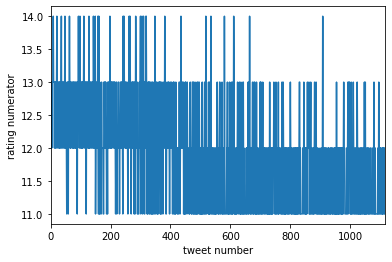

In [141]:
twitter_archive_master['rating_numerator'].plot()
plt.ylabel('rating numerator')
plt.xlabel('tweet number');

In [142]:
topdogstage=twitter_archive_master['dog_stages'].value_counts()
topdogstage

pupper            115
doggo              53
puppo              18
doggo, pupper       6
floofer             6
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

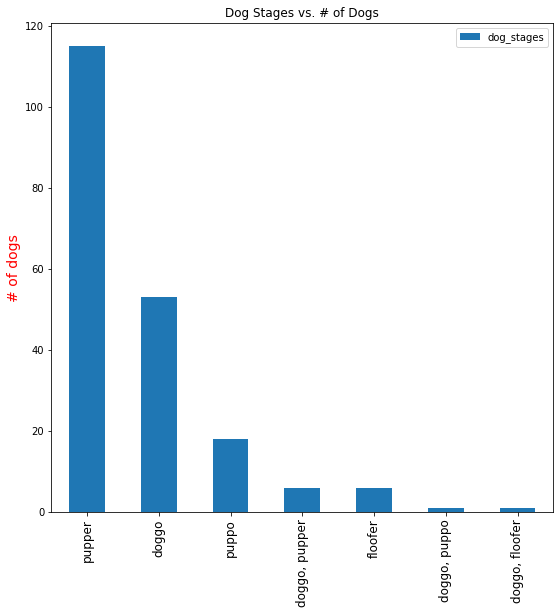

In [143]:
topdogstage.plot(kind='bar', figsize=(9,9))
plt.ylabel('# of dogs', color='r', fontsize=14)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Dog Stages vs. # of Dogs')
plt.legend();

In [144]:
#What are the Top 10 most popular dog names?
top_names=twitter_archive_master.groupby('name').count().sort_values(by='tweet_id', ascending=False).iloc[:10, :1]
top_names

,tweet_id
name,
Charlie,8
Tucker,8
Oliver,8
Cooper,8
Koda,6
Bo,6
Daisy,6
Penny,6
Lucy,6


C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


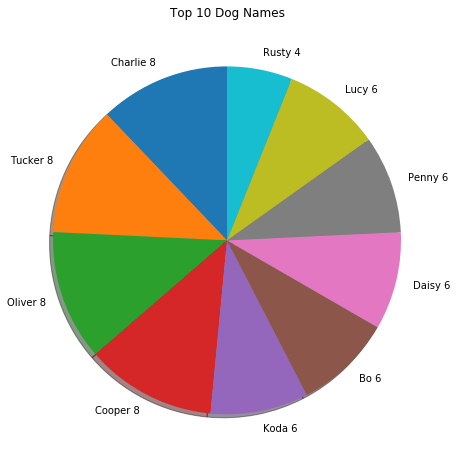

In [145]:
labels = ['Charlie 8', 'Tucker 8', 'Oliver 8', 'Cooper 8', 'Koda 6', 'Bo 6', 'Daisy 6', 'Penny 6', 'Lucy 6', 'Rusty 4']
plt.figure(figsize=(8, 8))
plt.pie(top_names, labels = labels, 
        shadow = True, startangle = 90)
plt.title('Top 10 Dog Names');

In [146]:
twitter_archive_master.shape

(1118, 15)

In [147]:
top_types=twitter_archive_master['type_of_dog'].value_counts()

In [148]:
top10=top_types.head(10)
top10

Golden_Retriever      107
Pembroke               74
Labrador_Retriever     59
Chihuahua              45
Chow                   34
Samoyed                34
Pomeranian             27
Toy_Poodle             26
Pug                    22
Cocker_Spaniel         19
Name: type_of_dog, dtype: int64

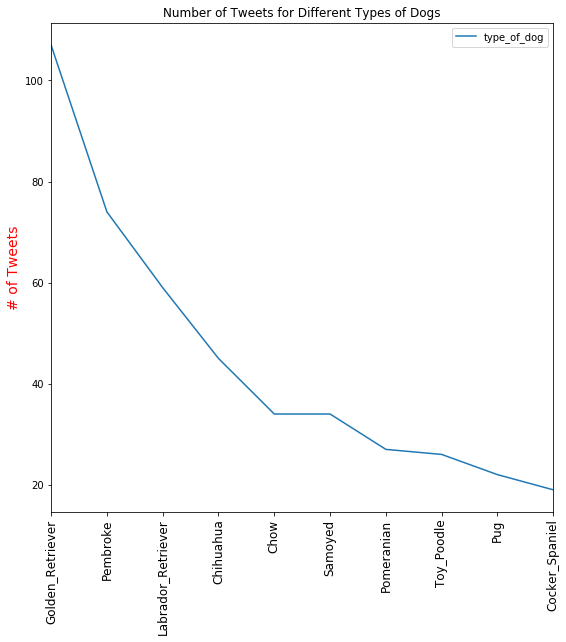

In [149]:
top10.plot(figsize=(9,9))
plt.ylabel('# of Tweets', color='r', fontsize=14)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Number of Tweets for Different Types of Dogs')
plt.legend();

In [150]:
top_10favs=twitter_archive_master[twitter_archive_master['favorite_count'] >80000]
top_10favs

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
57,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,41572,101406,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_Springer,0.383404,True
91,870374049280663552,2017-06-01 20:18:38+00:00,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,25103,80016,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden_Retriever,0.841001,True
106,866450705531457537,2017-05-22 00:28:40+00:00,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,33794,118878,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_Bulldog,0.905334,True
132,859196978902773760,2017-05-02 00:04:57+00:00,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN,29351,88375,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False
296,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,45064,136337,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_Terrier,0.196015,True
319,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,38371,90005,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard_Poodle,0.351308,True
382,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,58260,123534,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True
659,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79872,159897,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_Retriever,0.825333,True
674,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,NaN,doggo,59209,118107,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_Dog,0.503372,True
964,678399652199309312,2015-12-20 02:20:55+00:00,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,NaN,NaN,32191,80187,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,Swing,0.929196,False


In [151]:
top_10favs2=top_10favs.sort_values(by=['favorite_count','type_of_dog'])
top_10favs2

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,type_of_dog,% prediction,prediction_dog
91,870374049280663552,2017-06-01 20:18:38+00:00,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,25103,80016,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden_Retriever,0.841001,True
964,678399652199309312,2015-12-20 02:20:55+00:00,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,NaN,NaN,32191,80187,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,Swing,0.929196,False
132,859196978902773760,2017-05-02 00:04:57+00:00,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN,29351,88375,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False
319,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,38371,90005,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard_Poodle,0.351308,True
57,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,41572,101406,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_Springer,0.383404,True
674,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,NaN,doggo,59209,118107,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_Dog,0.503372,True
106,866450705531457537,2017-05-22 00:28:40+00:00,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,33794,118878,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_Bulldog,0.905334,True
382,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,58260,123534,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True
296,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,45064,136337,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_Terrier,0.196015,True
659,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79872,159897,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_Retriever,0.825333,True


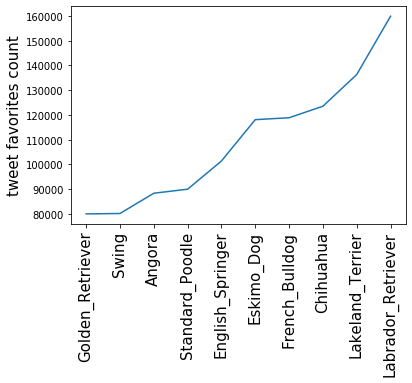

In [152]:
fav =top_10favs2['favorite_count']
dog =top_10favs2['type_of_dog']
plt.plot(dog, fav)
plt.ylabel('tweet favorites count', size = 15)
plt.xticks(rotation='vertical', size = 15);

In [153]:
#Let's find the top 3 dog images from the top_10 favorites, ID 393, 302, and 763 are the top 3 most favorited Tweets.
top2_images=top_10favs2['jpg_url']
top2_images

91       https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
964    https://pbs.twimg.com/ext_tw_video_thumb/67839...
132    https://pbs.twimg.com/ext_tw_video_thumb/85919...
319      https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
57     https://pbs.twimg.com/ext_tw_video_thumb/87941...
674    https://pbs.twimg.com/ext_tw_video_thumb/73923...
106      https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
382    https://pbs.twimg.com/ext_tw_video_thumb/80710...
296      https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
659    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

#659 the weblink does not work anymore as this was the top image!  But #296 does work so I will include that in my report as well as #106.

<a id='conclusions'></a>
## Conclusions

<a id='conclusions
'></a>
## Limitations

 - This data is from a social platform so don't take it too seriously.  Many more tweets would need to be analyzed for a longer period of time to gain a better understanding of the WeRateDogs followers.  I also noticed from the image predictions file that when an image was predicted false as a dog, many of those pictures were still of dogs.  This part was not 100% accurate as that model could use more work.  This was fun data to wrangle and analyze.    
 - Although I cleaned the dog name column, it is still very inconsistent.  "The" ended up in the top 10 for dog names as I only changed "none", and "a" to null values as those were easy ones to spot.

<a id='conclusions
'></a>
## Summary

- After cleaning over 5000 Tweets I ended up with data under 1200 Tweets.  Some of this data was quite messy at the begining with uneccesary columns and duplicates.  This was to be expected especially when merging three datasets together.
- The @dog_rates followers love dogs and will continue to retweet and favorite despite what the rating numerator is from the account owner.  The rating numerator had a few that were very high but then they seemed to level off after the "They are good dogs, Brent" meme.
- The most popular dog stage is a pupper.  "A pupper is classified as small dog usually younger or a doggo who is inexperienced, unfamiliar or anyway unprepared for doggo responsibilities."  This is from the in the WeRateDogs Dogtionary.
 
pupper            115
doggo              53
puppo              18
floofer             6
doggo, pupper       6
doggo, puppo        1
doggo, floofer      1

- The most popular dog names Tweeted were Charlie, Tucker, Oliver, and all with 8 occurences.

Charlie	8
Tucker	8
Oliver	8
Cooper	8
Koda	6
Bo   	6
Daisy	6
Penny	6
Lucy	6
Rusty	4

-  The @dog_rates Twitter account posts the most pictures of Golden Retrievers over other types.  Pembrokes were second and Pembrokes Labrador_Retrievers third.
 
Golden_Retriever      107
Pembroke               74
Labrador_Retriever     59
Chihuahua              45
Samoyed                34
Chow                   34
Pomeranian             27
Toy_Poodle             26
Pug                    22
Cocker_Spaniel         19

 - A labrador retriever ended up having the most favorites with 159897.  Unfortunately, the data does not tell us the dog's name.  The second most favored dog was a lakeland terrier with 136337 favorites.
